#title

In [1]:
x = 5
print(x)

5


1. sCREEN Capture
2. Generate dataset and load it
3. Fit the model using SVC and calcualte accuracy
4. Prediction of image drawn in paint

### package to capture screen : import pyscreenshot as ImageGrab

In [2]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder = "captured_images/9/"
    for i in range(0, 100):
        time.sleep(8)
        im = ImageGrab.grab(bbox=(40,281,400,600))
          # X1,Y1,X2,Y2
        print("saved...", i)
        im.save(images_folder + str(i) + ".png")
        print("clear screen now and redraw now...")


#Generate Dataset

In [3]:
# import cv2
# import csv
# import glob

# header = ["label"]
# for i in range(0, 784):
#     header.append("pixel"+str(i))

# with open('dataset.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(header)

# for label in range(10):
#     dirList = glob.glob("captured_images/"+str(label)+"/*.png")

#     for img_path in dirList:
#         im = cv2.imread(img_path)
#         im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#         im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
#         roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

#         data = []
#         data.append(label)
#         rows, cols = roi.shape

#         ## Add pixel one by one into data Array
#         for i in range(rows):
#             for j in range(cols):
#                 k = roi[i, j]
#                 if k > 100:
#                     k = 1
#                 else:
#                     k = 0
#                 data.append(k)

#         with open('dataset.csv', 'a') as f:
#             writer = csv.writer(f)
#             writer.writerow(data)


In [4]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
941,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#separation of dependent and indpendent variable
X = data.drop(["label"],axis = 1)
Y = data["label"]

preview of one image using matplotlib

3


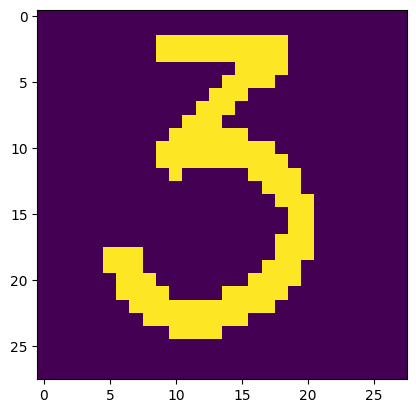

In [6]:
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [7]:
# Train-Test Split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

# Fit the Model using svc and also to save the model using joblib

In [8]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# calculate accuracy

In [9]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy:",metrics.accuracy_score(prediction,test_y))

Accuracy: 0.925


# predictin of image drwan in paint

In [10]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model=joblib.load("model/digit_recognizer")
images_folder = "img/"

while True:
    img = ImageGrab.grab(bbox=(40,281,400,600))
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray,(15,15),0)

    #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100,255,cv2.THRESH_BINARY)
    roi = cv2.resize(im_th,(28,28),interpolation=cv2.INTER_AREA)

    rows,cols = roi.shape

    X = []

    ## Add pixel one by one into data Array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
    
    predictions = model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8, (0,255,0), 2, cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)

    if cv2.waitKey(1)==13: #27 is the ASCII value of the escape key, 13 is the ASCII value of the enter key
        break 


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3
Prediction: 3


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


: 